In [1]:
import pandas as pd
df = pd.read_csv('kedaxunfei.csv')#调用CSV文件
df.head()#显示前五行

,date,code,close,high,low,open,p_change,turnover,volume,t_volue
0,2008/5/12,'002230,30.31,31.17,28.21,28.21,139.4155,84.9465,18212540,3248201460
1,2008/5/13,'002230,33.34,33.34,30.41,30.45,9.9967,23.3126,4998231,3572914440
2,2008/5/14,'002230,33.95,34.98,32.30,34.20,1.8296,22.9577,4922130,3638285700
3,2008/5/15,'002230,34.00,35.90,33.45,33.45,0.1473,21.6225,4635873,3643644000
4,2008/5/16,'002230,32.96,35.29,32.70,33.50,-3.0588,16.2214,3477867,3532191360


In [2]:
df = df.dropna()#删去空值行
df.head()

,date,code,close,high,low,open,p_change,turnover,volume,t_volue
0,2008/5/12,'002230,30.31,31.17,28.21,28.21,139.4155,84.9465,18212540,3248201460
1,2008/5/13,'002230,33.34,33.34,30.41,30.45,9.9967,23.3126,4998231,3572914440
2,2008/5/14,'002230,33.95,34.98,32.30,34.20,1.8296,22.9577,4922130,3638285700
3,2008/5/15,'002230,34.00,35.90,33.45,33.45,0.1473,21.6225,4635873,3643644000
4,2008/5/16,'002230,32.96,35.29,32.70,33.50,-3.0588,16.2214,3477867,3532191360


In [3]:
df = df.reset_index().drop(columns='index')#重建索引
df.head()

,date,code,close,high,low,open,p_change,turnover,volume,t_volue
0,2008/5/12,'002230,30.31,31.17,28.21,28.21,139.4155,84.9465,18212540,3248201460
1,2008/5/13,'002230,33.34,33.34,30.41,30.45,9.9967,23.3126,4998231,3572914440
2,2008/5/14,'002230,33.95,34.98,32.30,34.20,1.8296,22.9577,4922130,3638285700
3,2008/5/15,'002230,34.00,35.90,33.45,33.45,0.1473,21.6225,4635873,3643644000
4,2008/5/16,'002230,32.96,35.29,32.70,33.50,-3.0588,16.2214,3477867,3532191360


In [4]:
raw_time = pd.to_datetime(df.pop('date'), format='%Y-%m-%d')#抽取时间，并在表格中去掉时间列

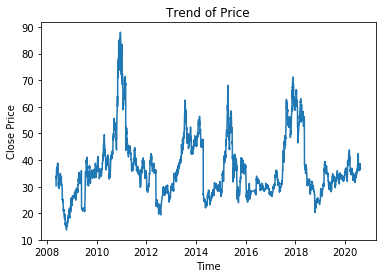

In [6]:
#折线图，股价走势
from matplotlib import pyplot as plt
plt.figure()
plt.plot(raw_time, df['close'])# close,收盘价
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Trend of Price')
plt.show()

从上图的股价趋势可以看出，科大讯飞的股价最高峰出现在2011年左右，长期来看股价波动较大。

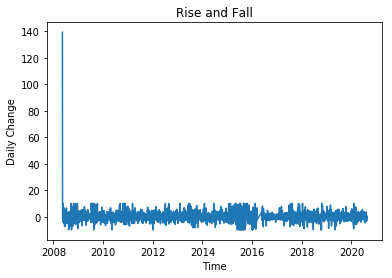

In [7]:
#日涨跌幅
plt.figure()
plt.plot(raw_time, df['p_change'])# p_change，涨跌幅
plt.xlabel('Time')
plt.ylabel('Daily Change')# daily change,当日涨跌幅
plt.title('Rise and Fall')
plt.show()


长期来看，除开盘当天涨幅超过100%，股票日涨跌基本不超过10%。

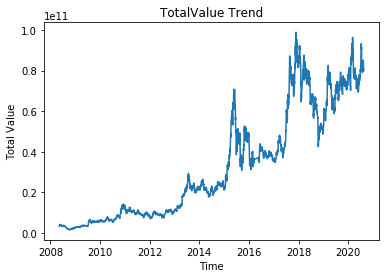

In [8]:
#折线图，总市值趋势
plt.figure()
plt.plot(raw_time, df['t_volue'])# t_volue,总市值
plt.xlabel('Time')
plt.ylabel("Total Value")
plt.title('TotalValue Trend')
plt.show()

2018年左右市值达到最高点，整体趋势稳步上升，市值不断增加。

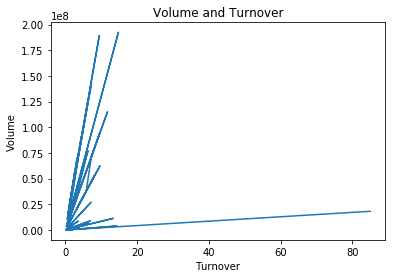

In [9]:
#换手率与成交量关系
plt.figure()
plt.plot(df['turnover'], df['volume'])# turnover，换手率，指在一定时间内市场中股票转手买卖的频率，是反映股票流通性强弱的指标之一。
plt.xlabel('Turnover')
plt.ylabel('Volume')
plt.title('Volume and Turnover')
plt.show()

换手率=成交量÷总流通量×100%,成交量越大,换手率越高,两者为正比关系。

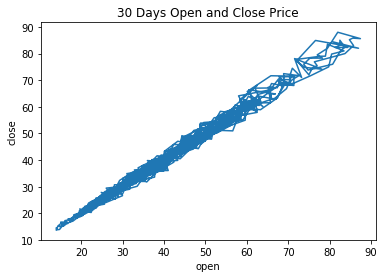

In [18]:
#30日内开盘价与收盘价散点图
plt.plot(df['open'][30:], df['close'][30:])
plt.xlabel('open')
plt.ylabel('close')
plt.title('30 Days Open and Close Price')
plt.show()

In [10]:
#相关系数矩阵
correlation = df.corr()
print(correlation)

             close      high       low      open  p_change  turnover  \
close     1.000000  0.997948  0.997228  0.994558  0.043165  0.146983   
high      0.997948  1.000000  0.996758  0.997098  0.012174  0.157961   
low       0.997228  0.996758  1.000000  0.997597  0.003233  0.123660   
open      0.994558  0.997098  0.997597  1.000000 -0.028832  0.132240   
p_change  0.043165  0.012174  0.003233 -0.028832  1.000000  0.494450   
turnover  0.146983  0.157961  0.123660  0.132240  0.494450  1.000000   
volume    0.172530  0.179318  0.161487  0.165807  0.074813  0.443611   
t_volue   0.212931  0.208745  0.220201  0.215223 -0.006861  0.124864   

            volume   t_volue  
close     0.172530  0.212931  
high      0.179318  0.208745  
low       0.161487  0.220201  
open      0.165807  0.215223  
p_change  0.074813 -0.006861  
turnover  0.443611  0.124864  
volume    1.000000  0.759775  
t_volue   0.759775  1.000000  


收盘价与当日最高价相关系数最大

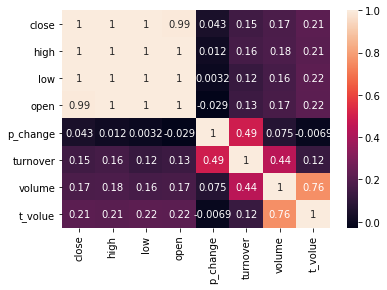

In [11]:
#热力图
import seaborn as sns
sns.heatmap(correlation, annot=True)